In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Linear Regression

f(x) = w * x + b
ie. y = w * x + b

where,
y = prediction
w = weight
x = feature
b = bias

In [66]:
data = pd.read_csv("datasets/headbrain.csv")

In [67]:
def model_output(x,w,b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] +b
    return f_wb[i]

In [68]:
def cost_function(x,y,w,b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb = m * x[i] + b
        cost =  (f_wb - y_train) ** 2
        total_cost = total_cost + cost
    total_cost = ( 1 / (2 * m)) * total_cost     
    return total_cost

In [69]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = ( f_wb - y[i] ) * x[i]
        dj_db_i = ( f_wb - y[i] )
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [70]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_descent):
    J = []
    P = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 10000:
            J.append(cost_function(x,y,w,b))
            P.append([w,b])
    return w, b, J, P

In [71]:
X_train = np.array([1,2])
y_train = np.array([300,500])
w_in = np.random.rand()
b_in = np.random.rand()
num_iters = 10000
alpha = 1.0e-2

In [72]:
w_final, b_final, J_array, P_array = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iters, cost_function, gradient_descent)

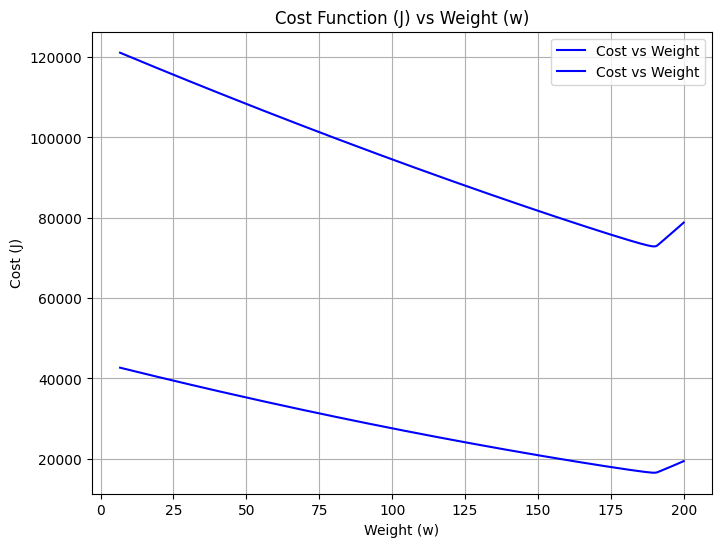

In [ ]:
import matplotlib.pyplot as plt

w_values = [p[0] for p in P_array]

plt.figure(figsize=(8, 6))
plt.plot(w_values, J_array, label="Cost vs Weight", color="blue")
plt.xlabel("Weight (w)")
plt.ylabel("Cost (J)")
plt.title("Cost Function (J) vs Weight (w)")
plt.grid(True)
plt.legend()

plt.show()

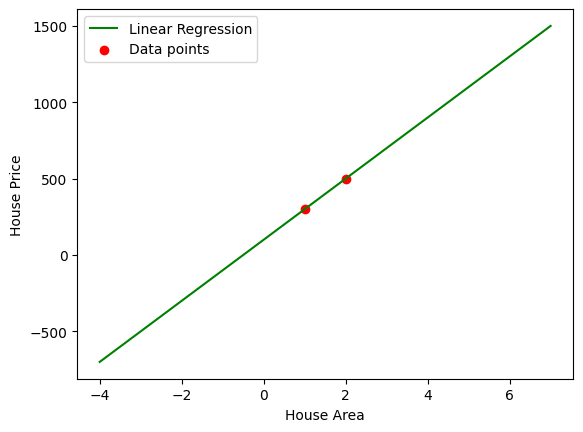

In [75]:
x_max = np.max(X_train) + 5
x_min = np.min(X_train) - 5

x = np.linspace(x_min, x_max, 1000)
y = w_final * x + b_final

plt.plot(x,y, color='green', label='Linear Regression')

plt.scatter(X_train,y_train, color='red', label='Data points')

plt.xlabel('House Area')
plt.ylabel('House Price')

plt.legend()
plt.show()

In [76]:
#Root Mean Squared Error
n = np.shape(X_train)[0]
rmse = 0
for i in range(n):
    pred = w_final * X_train[i] + b_final
    rmse += (y_train[i] - pred) ** 2
rmse = np.sqrt(rmse / n )
print("RMSE:", rmse)

RMSE: 0.003792417901682282


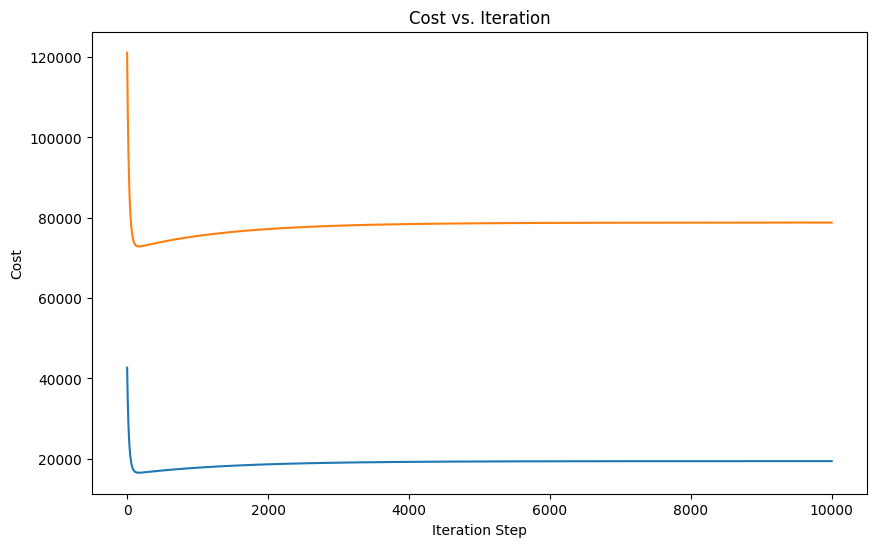

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(J_array, label="Cost")

ax.set_title("Cost vs. Iteration")
ax.set_ylabel('Cost')
ax.set_xlabel('Iteration Step')

plt.show()

In [47]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


## Multiple Variable Linear Regression

In [48]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [49]:
b_init = 0
w_init = np.random.rand(X_train.shape[1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'int'>


In [50]:
def predict_output(x,w,b):
    p = np.dot(x,w) +b
    return p

In [51]:
def compute_cost(x, y, w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i],w) +b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2*m)
    return cost

In [52]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1051.8247593666804


In [53]:
def compute_gradient(x,y,w,b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        error = (np.dot(x[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * x[i,j]
        dj_db = dj_db + error
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db


In [ ]:

tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [36399.45311341    76.89640644    54.52572957  1107.83417054]
dj_dw at initial w,b: 
 28.52387249285478


In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J = []
    P = []
    w = w_in 
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i <100000:
            J.append(cost_function(x,y,w,b))
            P.append([w,b])
    return w,b, J, P

In [ ]:

initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_array, P_array = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


## Linear Regression using Scikit-Learn

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [60]:
np.random.seed(42)
X = np.random.uniform(1, 100, 100).reshape(-1, 1) 
y = 5 * X.squeeze() + np.random.normal(0, 10, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Coefficients: [4.95945932]
Intercept: 1.4696738698420688
Mean Squared Error: 65.36995137170037
R-squared Score: 0.9972287944441832


In [63]:
X = np.random.uniform(1, 100, (100, 5))

y = 5 * X[:, 0] + 3 * X[:, 1] - 2 * X[:, 2] + X[:, 3] + 4 * X[:, 4] + np.random.normal(0, 10, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [84]:
X = data[['Head Size(cm^3)']]
y = data[['Brain Weight(grams)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Coefficients: [[0.26188776]]
Intercept: [328.60141186]
Mean Squared Error: 4672.043549643725
R-squared Score: 0.7149168473012071
